<a href="https://colab.research.google.com/github/MyArist/DQLab/blob/master/Learn/Python/Applied%20Data%20Science/Data%20Science%20in%20Telco%20Data%20Cleansing/Data%20Science%20in%20Telco%20Data%20Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science in Telco: Data Cleansing

# Introduction

### Latar Belakang

DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan. Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning. Oleh karena itu, tim Data Scientist dimimta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

### Tugas dan Langkah

Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum di lakukan permodelan. Pada tugas kali ini, kamu akan melakukan Data Prepocessing (Data Cleansing) bulan lalu, yakni Juni 2020. Langkah yang akan dilakukan adalah,

1. Mencari ID pelanggan (Nomor telphone) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4. Menstandarisasi Nilai dari Variable


## Library dan Data yang Digunakan

### Library yang Digunakan

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

1. Pandas

    Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

    - `read_csv()` digunakan untuk membaca file csv
    - `str.match()` digunakan untuk mencocokan dengan karakter tertentu
    - `drop()` digunakan untuk menghapus
    - `count()` digunakan untuk mengitung masing-masing variable
    - `drop_duplicates()` digunakan untuk menghapus data duplicate rows
    - `fillna()` digunakan untuk mengisi dengan nilai tertentu
    - `quantile()` digunakan untuk melihat quantile ke tertentu
    - `mask()` menganti nilai tertentu jika kondisi memenuhi
    - `astype()` merubah tipe data
    - `value_counts()` digunakan untuk mengitung unik dari kolom
    - `sort_values()` digunakan untuk sort values
    - `isnull()` digunakan untuk mendeteksi missing values
    - `dropna()` digunakan untuk menghapus missing values
    - `replace()` digunakan untuk mengganti nilai
    
2. Matplotlib

    Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

    - `figure()` digunakan untuk membuat figure gambar baru

3. Seaborn

    Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

    - `box_plot()` digunakan untuk membuat box plot

### Data yang DIgunakan

Untuk Dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python `df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')`
 
Untuk detil datanya adalah sebagai berikut:

- `UpdatedAt` Periode of Data taken
- `customerID`` Customer ID
- `gender` Whether the customer is a male or a female `(Male, Female)`
- `SeniorCitizen` Whether the customer is a senior citizen or not `(1, 0)`
- `Partner` Whether the customer has a partner or not `(Yes, No)`
- `Dependents` Whether the customer has dependents or not `(Yes, No)`
- `tenure` Number of months the customer has stayed with the company
- `PhoneService` Whether the customer has a phone service or not `(Yes, No)`
- `MultipleLines` Whether the customer has multiple lines or not `(Yes, No, No phone service)`
- `InternetService` Customer’s internet service provider `(DSL, Fiber optic, No)`
- `OnlineSecurity` Whether the customer has online security or not `(Yes, No, No internet service)`
- `OnlineBackup` Whether the customer has online backup or not `(Yes, No, No internet service)`
- `DeviceProtection` Whether the customer has device protection or not `(Yes, No, No internet service)`
- `TechSupport` Whether the customer has tech support or not `Yes, No, No internet service)`
- `StreamingTV` Whether the customer has streaming TV or not `(Yes, No, No internet service)`
- `StreamingMovies` Whether the customer has streaming movies or not `(Yes, No, No internet service)`
- `Contract` The contract term of the customer `(Month-to-month, One year, Two year)`
- `PaperlessBilling` Whether the customer has paperless billing or not `(Yes, No)`
- `PaymentMethod` The customer’s payment method `(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))`
- `MonthlyCharges` The amount charged to the customer monthly
- `TotalCharges` The total amount charged to the customer
- `Churn Whether` the customer churned or not `(Yes or No)`

### Import Library dan Dataset

Berdasarkan penjelasan mengenai library dan dataset yang akan digunakan, sekarang hal pertama yang akan kita lakukan adalah melakukan import library dan dataset ke dalam workspace kita.

Setelah dataset di-import ke dalam workspace, tampilkan jumlah kolom dan baris dari data set dengan menggunakan .shape dan print 5 baris teratas dengan menggunakan head() dan carilah ada berapa nilai customerID yang bersifat unique dengan menggunakan .unique

```
import pandas as pd
pd.options.display.max_columns = 50

df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')
```

**Notes** :

1. pd.options.display.max_columns = 50 digunakan untuk mempermudah penampilan row data

2. Simpan dataset ke dalam variabel df_load

In [ ]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head(5))

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

## Mencari Validitas ID Number Pelanggan

### Memfilter ID Number Pelanggan Format Tertentu

Mencari format ID Number (Phone Number) Pelanggan `customerID` yang benar, dengan kriteria:

- Panjang karakter adalah 11-12.
- Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
- Diawali dengan angka 45 2 digit pertama.
 
Gunakan fungsi `count()` untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan `str.match()` & regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan `astype()` untuk merubah tipe datanya yang semula numeric

**Notes** : Buat kolom bantuan baru dengan nama `valid_id`

In [ ]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


### Memfilter Duplikasi ID Number Pelanggan

Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

- Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
- Duplikasi dikarenakan inserting beda periode pengambilan data

Gunakan hasil dari pengolahan di tahap sebelumnya `df_load` untuk di olah di tahap ini. Gunakan fungsi `drop_duplicates()` untuk menghapus duplikasi rows, dan gunakan `sort_valus()` untuk mengecek pengambilan data terakhir

In [ ]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


### Kesimpulan

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersbut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 coloumns dengan 7017 jumlah ID yang Unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

## Mengatasi Missing Values

### Mengatasi Missing Values dengan Penghapusan Rows

Selanjutnya kita akan menghapus Rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Di asumsikan data modeller hanya mau menerima data yang benar ada flag churn nya atau tidak.

Gunakan `isnull()` digunakan untuk mendeteksi missing values dan `dropna()` untuk menghapus data yang missing values

In [ ]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


### Mengatasi Missing Values dengan Pengisian Nilai tertentu

Selain dengan mengapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

- Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk Lama berlangganan di isi dengan 11
- Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut

Tentukan :

- Apakah masih ada data yang missing values
- Jumlah Missing Values dari masing-masing variable
- Tangani Missing Valuesnya

In [ ]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

Jumlah Missing Values setelah di imputer datanya, adalah:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV

### Kesimpulan

Setelah kita analisis lebih lanjut, ternyata masih ada Missing Values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (Outlier)

## Mengatasi Outlier

### Mendeteksi adanya Outlier (Boxplot)

Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

Gunakan package `matplotlib` & `seaborn` untuk memvisualisasika data-data yang mau dilihat box plot nya. Fungsi `describe()` gunakan saat untuk melihat deskripsi datanya


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


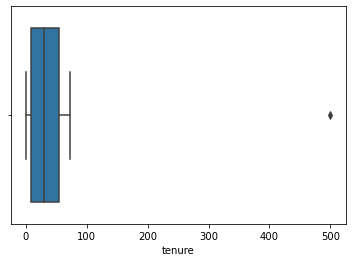

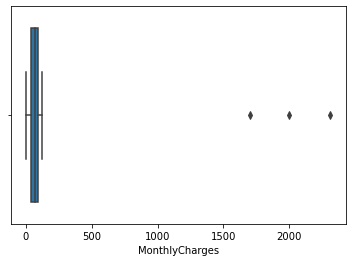

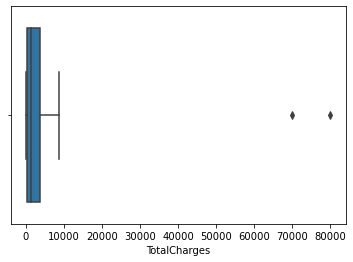

In [ ]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Mengatasi Outlier

Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR). Untuk detil jelasnya, bisa dilihat di ilustrasi di bawah ini:
 
Gunakan hasil dari pengolahan di tahap sebelumnya `df_load` untuk di olah di tahap ini. Gunakan fungsi `quantile()` untuk melihat quantile tertentu, dan gunakan `mask()` untuk mereplace nilai. Tentukan:

- Nilai Minimum dan Maximum data di tolerir
- Ubah Nilai yg di luar Range Minumum & Maximum ke dalam nilai Minimum dan Maximum

In [ ]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


### Kesimpulan

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya. Kemudian kalo kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali. Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum & Minimum dari interquartile range (IQR). Setelah di tangani outliernya, dan dilihat perseberan data nya, terlihat sudah tidak ada lagi nilai yang outlier.

## Menstandarisasi Nilai

### Mendeteksi Nilai yang tidak Standar

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standarisasi dari data yang sudah terinput. Gunakan fungsi `value_counts()` untuk melihat jumlah data unique per variable nya

In [ ]:
# Masukkan variable
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

### Menstandarisasi Variable Kategorik

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standar, maka kita standarkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. Gunakan fungsi `replace()` untuk menstandarkan nilai.

In [ ]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


### Kesimpulan

Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah :

- `Gender` (Female, Male, Wanita, Laki-Laki), yang bisa di standarkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
- `Dependents` (Yes, No, Iya), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
- `Churn` (Yes, No, Churn), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Setelah kita standarkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value nya.

## You Have Passed the Module

![](https://github.com/MyArist/DQLab/blob/master/Learn/Python/Applied%20Data%20Science/Data%20Science%20in%20Telco%20Data%20Cleansing/Picts/congratulations.png?raw=1)